I'm going to use newspaper text as training data to develop a Neural Network that can translate between different English dialects. As a start, I'll compare different countries (U.S. vs U.K., but could add South Africa, Australia, Bahamas, Belize, Ghana, etc.), but it could be trained to work on regions within countries.<br /><br />
I'll start by downloading U.K. training data from The Guardian.

In [150]:
import json
import requests
from os import makedirs
from os.path import join, exists
from datetime import date, timedelta
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [8]:

ARTICLES_DIR = join('tempdata', 'articles')
makedirs(ARTICLES_DIR, exist_ok=True)
# Sample URL
#
# http://content.guardianapis.com/search?from-date=2010-01-01&
# to-date=2018-01-01&order-by=newest&show-fields=all&page-size=200
# &api-key=your-api-key-goes-here

MY_API_KEY = open("guardian_key.txt").read().strip()
API_ENDPOINT = 'http://content.guardianapis.com/search'
my_params = {
    'from-date': "2011-05-06",
    'to-date': "2018-01-01",
    'order-by': "newest",
    'show-fields': 'all',
    'page-size': 200, # 200 is the max
    'api-key': MY_API_KEY
}


# day iteration from here:
# http://stackoverflow.com/questions/7274267/print-all-day-dates-between-two-dates
start_date = date(2011, 5, 6)
end_date = date(2018, 1, 1)
dayrange = range((end_date - start_date).days + 1)
for daycount in dayrange:
    dt = start_date + timedelta(days=daycount)
    datestr = dt.strftime('%Y-%m-%d')
    fname = join(ARTICLES_DIR, datestr + '.json')
    if not exists(fname):
        # then let's download it
        print("Downloading", datestr)
        all_results = []
        my_params['from-date'] = datestr
        my_params['to-date'] = datestr
        current_page = 1
        total_pages = 1
        while current_page <= total_pages:
            print("...page", current_page)
            my_params['page'] = current_page
            resp = requests.get(API_ENDPOINT, my_params)
            data = resp.json()
            all_results.extend(data['response']['results'])
            # if there is more than one page
            current_page += 1
            total_pages = data['response']['pages']

        with open(fname, 'w') as f:
            print("Writing to", fname)

            # re-serialize it for pretty indentation
            f.write(json.dumps(all_results, indent=2))

...page 1
...page 2
Writing to tempdata/articles/2011-05-07.json
...page 1
Writing to tempdata/articles/2011-05-08.json
...page 1
...page 2
Writing to tempdata/articles/2011-05-09.json
...page 1
...page 2
Writing to tempdata/articles/2011-05-10.json
...page 1
...page 2
Writing to tempdata/articles/2011-05-11.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-05-12.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-05-13.json
...page 1
...page 2
Writing to tempdata/articles/2011-05-14.json
...page 1
Writing to tempdata/articles/2011-05-15.json
...page 1
...page 2
Writing to tempdata/articles/2011-05-16.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-05-17.json
...page 1
...page 2
Writing to tempdata/articles/2011-05-18.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-05-19.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-05-20.json
...page 1
...page 2
Writing to tempdata/articles/2011-05-21.

Writing to tempdata/articles/2011-08-07.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-08.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-09.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-10.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-11.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-08-12.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-13.json
...page 1
Writing to tempdata/articles/2011-08-14.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-15.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-16.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-17.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-18.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-08-19.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-20.json
...page 1
Writing to tempdata/articles/2011-08-21.json
...page 1
...page 2
Writing to tempdata/artic

...page 2
Writing to tempdata/articles/2011-11-08.json
...page 1
...page 2
Writing to tempdata/articles/2011-11-09.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-11-10.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-11-11.json
...page 1
Writing to tempdata/articles/2011-11-12.json
...page 1
...page 2
Writing to tempdata/articles/2011-11-13.json
...page 1
...page 2
Writing to tempdata/articles/2011-11-14.json
...page 1
...page 2
Writing to tempdata/articles/2011-11-15.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-11-16.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-11-17.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-11-18.json
...page 1
Writing to tempdata/articles/2011-11-19.json
...page 1
...page 2
Writing to tempdata/articles/2011-11-20.json
...page 1
...page 2
Writing to tempdata/articles/2011-11-21.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-11-22.

...page 2
Writing to tempdata/articles/2012-02-09.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2012-02-10.json
...page 1
Writing to tempdata/articles/2012-02-11.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-12.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-13.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-14.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-15.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-16.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2012-02-17.json
...page 1
Writing to tempdata/articles/2012-02-18.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-19.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-20.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-21.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-22.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-23.json
...page 1
...page 2
...page 3
Writi

...page 2
Writing to tempdata/articles/2012-05-12.json
...page 1
Writing to tempdata/articles/2012-05-13.json
...page 1
...page 2
Writing to tempdata/articles/2012-05-14.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2012-05-15.json
...page 1
...page 2
Writing to tempdata/articles/2012-05-16.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2012-05-17.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2012-05-18.json
...page 1
...page 2
Writing to tempdata/articles/2012-05-19.json
...page 1
Writing to tempdata/articles/2012-05-20.json
...page 1
...page 2
Writing to tempdata/articles/2012-05-21.json
...page 1
...page 2
Writing to tempdata/articles/2012-05-22.json
...page 1
...page 2
Writing to tempdata/articles/2012-05-23.json
...page 1
...page 2
Writing to tempdata/articles/2012-05-24.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2012-05-25.json
...page 1
...page 2
Writing to tempdata/articles/2012-05-26.json
...page 1
Writi

Writing to tempdata/articles/2012-08-12.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-13.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-14.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-15.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-16.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2012-08-17.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-18.json
...page 1
Writing to tempdata/articles/2012-08-19.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-20.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-21.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-22.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-23.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2012-08-24.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-25.json
...page 1
Writing to tempdata/articles/2012-08-26.json
...page 1
Writing to tempdata/articles/2012-0

ChunkedEncodingError: ("Connection broken: ConnectionResetError(54, 'Connection reset by peer')", ConnectionResetError(54, 'Connection reset by peer'))

In [10]:
!ls tempdata/articles/*.json | wc -l # number of files with news articles

     990


In [11]:
!grep webPublicationDate tempdata/articles/*.json | wc -l # count how many articles we have

  315778


In [35]:
# merge the JSON files into a single file
import glob

read_files = glob.glob("tempdata/articles/*.json")

with open("tempdata/articles/merged_file.json", "w") as outfile:
     for f in read_files:
            with open(f, "r") as infile:
                temp_infile = infile.read()
                outfile.write(temp_infile)
                outfile.write(',\n')


tempdata/articles/2011-12-10.json
tempdata/articles/2011-02-10.json
tempdata/articles/2010-08-09.json
tempdata/articles/2012-01-23.json
tempdata/articles/2010-06-17.json
tempdata/articles/2010-09-24.json
tempdata/articles/2010-05-07.json
tempdata/articles/2011-06-04.json
tempdata/articles/2010-12-03.json
tempdata/articles/2012-09-14.json
tempdata/articles/2010-02-03.json
tempdata/articles/2011-05-14.json
tempdata/articles/2011-07-29.json
tempdata/articles/2010-11-13.json
tempdata/articles/2012-06-27.json
tempdata/articles/2010-01-13.json
tempdata/articles/2011-06-12.json
tempdata/articles/2012-09-02.json
tempdata/articles/2010-02-15.json
tempdata/articles/2010-10-28.json
tempdata/articles/2010-12-15.json
tempdata/articles/2012-05-21.json
tempdata/articles/2011-05-02.json
tempdata/articles/2011-09-21.json
tempdata/articles/2010-01-05.json
tempdata/articles/2010-11-05.json
tempdata/articles/2011-02-06.json
tempdata/articles/2011-12-06.json
tempdata/articles/2010-06-01.json
tempdata/artic

tempdata/articles/2010-08-08.json
tempdata/articles/2010-06-16.json
tempdata/articles/2010-07-30.json
tempdata/articles/2011-10-27.json
tempdata/articles/2012-01-29.json
tempdata/articles/2010-08-03.json
tempdata/articles/2012-03-14.json
tempdata/articles/2010-04-20.json
tempdata/articles/2011-07-23.json
tempdata/articles/2010-11-19.json
tempdata/articles/2012-04-10.json
tempdata/articles/2010-03-24.json
tempdata/articles/2010-01-19.json
tempdata/articles/2011-08-10.json
tempdata/articles/2010-12-09.json
tempdata/articles/2010-02-09.json
tempdata/articles/2011-05-08.json
tempdata/articles/2012-08-25.json
tempdata/articles/2012-04-06.json
tempdata/articles/2011-06-18.json
tempdata/articles/2011-04-25.json
tempdata/articles/2011-08-06.json
tempdata/articles/2012-09-08.json
tempdata/articles/2010-10-22.json
tempdata/articles/2012-07-16.json
tempdata/articles/2011-03-21.json
tempdata/articles/2010-07-26.json
tempdata/articles/2011-10-31.json
tempdata/articles/2010-08-15.json
tempdata/artic

tempdata/articles/2012-02-01.json
tempdata/articles/2010-09-16.json
tempdata/articles/2011-08-28.json
tempdata/articles/2012-05-05.json
tempdata/articles/2010-12-31.json
tempdata/articles/2011-05-26.json
tempdata/articles/2011-09-05.json
tempdata/articles/2010-01-21.json
tempdata/articles/2010-11-21.json
tempdata/articles/2012-06-15.json
tempdata/articles/2012-04-28.json
tempdata/articles/2010-08-17.json
tempdata/articles/2010-06-09.json
tempdata/articles/2010-05-19.json
tempdata/articles/2010-07-24.json
tempdata/articles/2011-03-23.json
tempdata/articles/2012-07-14.json
tempdata/articles/2012-05-29.json
tempdata/articles/2010-10-20.json
tempdata/articles/2011-08-04.json
tempdata/articles/2011-04-27.json
tempdata/articles/2012-04-04.json
tempdata/articles/2010-03-30.json
tempdata/articles/2012-08-27.json
tempdata/articles/2011-09-29.json
tempdata/articles/2012-07-02.json
tempdata/articles/2011-08-12.json
tempdata/articles/2010-03-26.json
tempdata/articles/2012-08-31.json
tempdata/artic

tempdata/articles/2011-02-28.json
tempdata/articles/2011-12-28.json
tempdata/articles/2011-10-15.json
tempdata/articles/2010-04-12.json
tempdata/articles/2012-03-26.json
tempdata/articles/2010-08-31.json
tempdata/articles/2011-07-11.json
tempdata/articles/2010-03-16.json
tempdata/articles/2012-08-01.json
tempdata/articles/2012-04-22.json
tempdata/articles/2011-04-01.json
tempdata/articles/2011-08-22.json
tempdata/articles/2012-02-27.json
tempdata/articles/2010-09-30.json
tempdata/articles/2010-05-13.json
tempdata/articles/2011-11-14.json
tempdata/articles/2011-03-29.json
tempdata/articles/2011-01-14.json
tempdata/articles/2010-06-03.json
tempdata/articles/2011-12-04.json
tempdata/articles/2011-02-04.json
tempdata/articles/2010-11-07.json
tempdata/articles/2010-01-07.json
tempdata/articles/2011-09-23.json
tempdata/articles/2012-05-23.json
tempdata/articles/2010-12-17.json
tempdata/articles/2010-02-17.json
tempdata/articles/2011-06-10.json
tempdata/articles/2010-01-11.json
tempdata/artic

## Get U.S. news articles
I had a hard time finding newspaper APIs that would allow me to download the entire article. Instead, I'm going to use Selenium to scrape articles from USA Today.

In [32]:
import urllib.request, json 

outfile = open('nytimes_data.txt', 'w')

for offset in range(10):
    #address = "https://api.nytimes.com/svc/search/v2/articlesearch.json?offset=%s&api-key=cdbf688a895b41dfa24a692d2b85a96a" % str(offset)
    address = "https://api.nytimes.com/svc/search/v2/articlesearch.json?offset=%s&api-key=cdbf688a895b41dfa24a692d2b85a96a" % str(offset)
    with urllib.request.urlopen(address) as url:
        data = json.loads(url.read().decode())
        print(data)
        outfile.write(data)

        # this lets you search for 1000 a day. So, it is all I have for now.

{'status': 'OK', 'copyright': 'Copyright (c) 2018 The New York Times Company. All Rights Reserved.', 'response': {'docs': [{'web_url': 'https://www.nytimes.com/aponline/2018/01/16/business/ap-us-ford-outlook.html', 'snippet': 'Ford Motor Co. says its pretax earnings will likely fall in 2018 as U.S. sales soften, commodity costs increase and it invests heavily in new electric and hybrid vehicles.', 'blog': {}, 'source': 'AP', 'multimedia': [], 'headline': {'main': 'Ford Says Profits Will Fall in 2018', 'kicker': None, 'content_kicker': None, 'print_headline': 'Ford Says Profits Will Fall in 2018', 'name': None, 'seo': None, 'sub': None}, 'keywords': [], 'pub_date': '2018-01-16T23:21:33+0000', 'document_type': 'article', 'new_desk': 'None', 'byline': {'original': 'By THE ASSOCIATED PRESS', 'person': [], 'organization': 'THE ASSOCIATED PRESS'}, 'type_of_material': 'News', '_id': '5a5e890095d0e0110c1a4e08', 'word_count': 132, 'score': 1.0, 'uri': 'nyt://article/9a751257-b518-534b-887d-b9df

TypeError: write() argument must be str, not dict

In [2]:
import newspaper

def write_newspaper_test(output_filename, newspaper_url, threshold):
    counter = 0
    with open(output_filename, 'w') as output_file:

        paper = newspaper.build(newspaper_url, memoize_articles=False)

        for article in paper.articles:
            counter += 1
            try: # I'm using this because sometimes I get a 404 error
                print(type(article.url), article.url)
                article.download()
                article.parse()
                output_file.write(article.url)
                output_file.write('\n')
                output_file.write(article.text)
                output_file.write('\n')
            except:
                True
            if counter > threshold:
                break

write_newspaper_test('usatoday_text.txt', 'http://usatoday.com', 100)
write_newspaper_test('cnn_text.txt', 'http://cnn.com', 100)
write_newspaper_test('wp_text.txt', 'http://washingtonpost.com', 100)
    
    
    

<class 'str'> http://usatoday.com/media/latest/videos/news/
<class 'str'> http://usatoday.com/story/news/2013/01/09/corrections-clarifications/1821023/
<class 'str'> http://usatoday.com/media/latest/photos/news/
<class 'str'> http://usatoday.com/story/news/nation-now/2018/01/16/larry-nassar-sentencing-victims/1037845001/
<class 'str'> http://usatoday.com/story/news/2018/01/16/larry-nassar-sentencing-victim-statements/1037631001/
<class 'str'> http://usatoday.com/story/sports/columnist/nancy-armour/2018/01/16/usa-gymnastics-must-leave-karolyi-ranch-now-forcing-gymnasts-return-karolyi-ranch-usa-gymnastics-per/1035996001/
<class 'str'> http://usatoday.com/story/news/politics/2018/01/16/shift-tone-trump-says-he-wants-immigrants-everywhere/1037086001/
<class 'str'> http://usatoday.com/story/news/politics/2018/01/16/ex-cia-officer-arrested-illegally-possessing-classified-defense-information/1038352001/
<class 'str'> http://usatoday.com/story/money/cars/2018/01/16/nissan-ceo-infiniti-luxury-b

<class 'str'> http://usatoday.com/picture-gallery/money/cars/2018/01/10/whats-hot-at-the-2018-detroit-auto-show/109329924/
<class 'str'> http://usatoday.com/picture-gallery/news/2018/01/07/passages-2018-those-weve-lost-through-the-year/109250772/
<class 'str'> http://usatoday.com/picture-gallery/life/entertainthis/2018/01/10/want-to-feel-old-these-songs-turn-10-in-2018/109331944/
<class 'str'> http://usatoday.com/picture-gallery/sports/2018/01/15/meet-the-2018-dog-bowl-participants/109481890/
<class 'str'> http://usatoday.com/story/sports/nfl/2018/01/15/championship-game-x-factors-under-radar-players-nfl-playoffs/1033957001/
<class 'str'> http://usatoday.com/story/sports/nfl/2018/01/15/minnesota-vikings-philadelphia-eagles-nfc-championship-game-preview/1033309001/
<class 'str'> http://usatoday.com/story/sports/nfl/columnist/mike-jones/2018/01/15/case-keenum-blake-bortles-nick-foles-nfl-playoffs/1034514001/
<class 'str'> http://usatoday.com/news/nation/
<class 'str'> http://usatoday.com

/Users/dan/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 4108 bytes but only got 468. Skipping tag 59932
  " Skipping tag %s" % (size, len(data), tag))
/Users/dan/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:709: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
/Users/dan/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 4108 bytes but only got 1492. Skipping tag 59932
  " Skipping tag %s" % (size, len(data), tag))
/Users/dan/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 4108 bytes but only got 2516. Skipping tag 59932
  " Skipping tag %s" % (size, len(data), tag))
/Users/dan/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expe

<class 'str'> http://money.cnn.com/2017/09/12/investing/cobalt-tungsten-rare-earths-metals-commodities/index.html
<class 'str'> http://money.cnn.com/2017/08/25/news/arctic-ice-tanker-ship/index.html
You must `download()` an article first!
<class 'str'> http://money.cnn.com/2017/09/12/news/boeing-bombardier-trump-may-jobs/index.html
<class 'str'> http://cnn.it/2017/03/04/vr/how-to-watch-vr
<class 'str'> http://cnn.com/hln-morning-express-tour-robin-meade
Article `download()` failed with 404 Client Error: Not Found for url: http://www.cnn.com/hln-morning-express-tour-robin-meade on URL http://cnn.com/hln-morning-express-tour-robin-meade
<class 'str'> http://www.cnn.com/travel/article/game-of-thrones-ice-hotel-lapland/index.html
<class 'str'> http://www.cnn.com/travel/article/il-san-pietro-positano-italy/index.html
<class 'str'> http://www.cnn.com/travel/article/jordan-food-drink/index.html
<class 'str'> http://www.cnn.com/travel/article/things-to-do-puebla-mexico/index.html
<class 'str'>

<class 'str'> https://www.washingtonpost.com/news/dr-gridlock/wp/2018/01/16/a-man-tried-to-board-a-flight-wearing-everything-he-packed-british-airways-gave-him-the-boot/?utm_term=.1d25141fb001
<class 'str'> https://www.washingtonpost.com/news/innovations/wp/2018/01/15/big-brother-on-wheels-why-your-car-company-may-know-more-about-you-than-your-spouse/?utm_term=.1c0eaaf31e35
<class 'str'> https://www.washingtonpost.com/news/arts-and-entertainment/wp/2018/01/15/aziz-ansari-responds-to-sexual-misconduct-allegation/
<class 'str'> https://www.washingtonpost.com/news/post-politics/wp/2018/01/14/how-a-mans-first-ever-tweet-about-obamas-respect-proved-more-popular-than-trumps-bluster/
<class 'str'> http://www.washingtonpost.com/news/acts-of-faith/wp/2018/01/16/a-missing-tourist-scattered-bible-pages-in-israels-desert-is-jerusalem-syndrome-to-blame/
<class 'str'> https://www.washingtonpost.com/news/post-politics/wp/2018/01/16/adult-film-star-reportedly-spoke-to-journalist-in-2016-about-trump-se

<class 'str'> https://www.washingtonpost.com/local/public-safety/ex-cia-officer-charged-with-taking-notebooks-full-of-classified-information/2018/01/16/1f629634-fb06-11e7-a46b-a3614530bd87_story.html
<class 'str'> https://www.washingtonpost.com/news/posteverything/wp/2018/01/16/the-hawaii-alert-was-an-accident-the-dread-it-inspired-wasnt/
<class 'str'> https://www.washingtonpost.com/news/posteverything/wp/2018/01/16/a-trade-war-with-china-would-backfire-on-trump-and-america/
<class 'str'> https://www.washingtonpost.com/news/posteverything/wp/2018/01/16/librarians-despise-censorship-how-can-prison-librarians-handle-that-its-complicated/
<class 'str'> https://www.washingtonpost.com/news/posteverything/wp/2018/01/16/the-good-news-about-hawaiis-false-alarm/
<class 'str'> https://www.washingtonpost.com/news/dr-gridlock/wp/2018/01/15/red-line-train-carrying-at-least-60-passengers-derails-near-farragut-north/
<class 'str'> https://www.washingtonpost.com/local/md-politics/md-candidates-face-de

# Create a database to put all of the news data into

In [9]:
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd

In [10]:
# Define a database name
# Set your postgres username
dbname = 'news_articles'
username = 'dan' # change this to your username


In [29]:
## 'engine' is a connection to a database
## Here, we're using postgres, but sqlalchemy can connect to other things too.
from sqlalchemy import create_engine
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print(engine.url)

postgres://dan@localhost/news_articles


In [30]:
## create a database (if it doesn't exist)
if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

True


In [42]:
#Create table in database
command = (
        """
        CREATE TABLE british (
            source VARCHAR(20),
            region VARCHAR(2),
            url VARCHAR(250),
            sentence TEXT
            );
        CREATE TABLE american (
            source VARCHAR(20),
            region VARCHAR(2),
            url VARCHAR(250),
            sentence TEXT
            )
            
        """)
print(command)


        CREATE TABLE british (
            source VARCHAR(20),
            region VARCHAR(2),
            url VARCHAR(250),
            sentence TEXT
            );
        CREATE TABLE american (
            source VARCHAR(20),
            region VARCHAR(2),
            url VARCHAR(250),
            sentence TEXT
            )
            
        


In [43]:
conn = None
conn = psycopg2.connect(database = dbname, user = username)
cur = conn.cursor()

# create table one by one
cur.execute(command)
# close communication with the PostgreSQL database server
cur.close()
# commit the changes
conn.commit()

In [45]:
# This will delete the database table named 'sentences'
#import psycopg2
#conn = psycopg2.connect("dbname='news_articles' user='dan'")
#cur = conn.cursor()
#cur.execute('DROP TABLE "american";')  
#cur.execute('DROP TABLE "british";')    
#conn.commit()
#conn.close()

In [46]:
#Check to see if tables exist in db
cur = conn.cursor()
cur.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
print (cur.fetchall())

[('british',), ('american',)]


In [47]:
# read a database from JSON and load it into a pandas dataframe
# here I'm adding data to the database where each row contains the id, source, publicationDate, productionOffice, sentence
# to create the sentences, I'm splitting on each '.'. This is not ideal if there are a lot of abbreviations, but I'm
# assuming there aren't.

import glob, json

#Create query to insert data to products table
#add_to_guardian = """INSERT INTO guardian(id,webPublicationDate,productionOffice,bodyText) VALUES(%s,%s,%s,%s)"""
def add_guardian_data(article_file): # these files are JSON
    read_files = glob.glob(article_file)
    '''
    source VARCHAR(20),
    region VARCHAR(2),
    url VARCHAR(150),
    sentence TEXT
    '''

    # process a subset of the articles from The Guardian
    for read_file in read_files:
        with open(read_file) as json_file:
            print(read_file)
            json_data = json.load(json_file) # this opens all entries. we need to iterate through each one to get the important data
            for json_entry in json_data:
                temp_source = 'guardian'
                temp_region = 'uk'
                temp_url = json_entry['webUrl']
                temp_productionOffice = json_entry['fields']['productionOffice']
                temp_bodyText = json_entry['fields']['bodyText']

                for sentence in temp_bodyText.split('.'):
                    if temp_productionOffice == 'UK': # just to make sure we only have UK articles
                        add_to_guardian = """INSERT INTO british(source,region,url,sentence) VALUES(%s,%s,%s,%s)"""
                        data = (temp_source,temp_region,temp_url,sentence.lower())
                        cur.execute(add_to_guardian,data)


                        

add_guardian_data("tempdata/articles/2010-01-01.json")
add_guardian_data("tempdata/articles/2010-01-02.json")
add_guardian_data("tempdata/articles/2010-01-03.json")
add_guardian_data("tempdata/articles/2010-01-04.json")
add_guardian_data("tempdata/articles/2010-01-05.json")
add_guardian_data("tempdata/articles/2010-01-06.json")
add_guardian_data("tempdata/articles/2010-01-07.json")
add_guardian_data("tempdata/articles/2010-01-08.json")
add_guardian_data("tempdata/articles/2010-01-09.json")
add_guardian_data("tempdata/articles/2010-01-10.json")
add_guardian_data("tempdata/articles/2010-01-11.json")
add_guardian_data("tempdata/articles/2010-01-12.json")
add_guardian_data("tempdata/articles/2010-01-13.json")

cur.close()
conn.commit()

    


tempdata/articles/2010-01-01.json
tempdata/articles/2010-01-02.json
tempdata/articles/2010-01-03.json
tempdata/articles/2010-01-04.json
tempdata/articles/2010-01-05.json
tempdata/articles/2010-01-06.json
tempdata/articles/2010-01-07.json
tempdata/articles/2010-01-08.json
tempdata/articles/2010-01-09.json
tempdata/articles/2010-01-10.json
tempdata/articles/2010-01-11.json
tempdata/articles/2010-01-12.json
tempdata/articles/2010-01-13.json


# Add the Washington Post and CNN articles into the database.

In [49]:
cur = conn.cursor()

'''
source VARCHAR(20),
region VARCHAR(2),
url VARCHAR(150),
sentence TEXT
'''

def insert_news_data(file_of_text_data, temp_source, temp_region):
    with open(file_of_text_data) as news_file:
        temp_url = ''

        for line in news_file:
            if 'http' == line[0:4]:
                temp_url = line.split()[0]
            else:
                if len(line.split()) > 1: # not a blank line if true
                    for temp_sentence in line[0:-1].split('.'):
                        if temp_sentence not in ['\n', '']:
                            add_to_db = """INSERT INTO american(source,region,url, sentence) VALUES(%s,%s,%s,%s)"""
                            data = (temp_source,temp_region,temp_url,temp_sentence.lower())
                            #print(data, '\n\n')
                            cur.execute(add_to_db,data)

insert_news_data('cnn_text.txt', 'cnn', 'US')
insert_news_data('wp_text.txt', 'wa_post', 'US')
                   
cur.close()
conn.commit()

    

In [52]:
cur = conn.cursor()
cur.execute("SELECT count(*) FROM american;")
print (cur.fetchall())

[(9632,)]


# Now pull the data into a dataframe using Pandas.

In [70]:
command = '''SELECT * 
             FROM british 
             UNION ALL
             SELECT * 
             FROM american;
             '''

# Read in the data into Pandas
df = pd.read_sql_query(command, con=engine)

In [72]:
df.head()


,source,region,url,sentence
100349,cnn,US,http://cnn.com/2018/01/11/opinions/ending-the-...,the president would not be helping american or...
100350,cnn,US,http://cnn.com/2018/01/11/opinions/ending-the-...,he certainly would not be helping hundreds of...
100351,cnn,US,http://cnn.com/2018/01/11/opinions/ending-the-...,what such a decision will do is seriously comp...
100352,cnn,US,http://cnn.com/2018/01/11/opinions/ending-the-...,"at the same time, withdrawal would give new st..."
100353,cnn,US,http://cnn.com/2018/01/11/opinions/ending-the-...,"at the same time, america would be left even ..."


In [73]:
df.tail()

,source,region,url,sentence
100349,cnn,US,http://cnn.com/2018/01/11/opinions/ending-the-...,the president would not be helping american or...
100350,cnn,US,http://cnn.com/2018/01/11/opinions/ending-the-...,he certainly would not be helping hundreds of...
100351,cnn,US,http://cnn.com/2018/01/11/opinions/ending-the-...,what such a decision will do is seriously comp...
100352,cnn,US,http://cnn.com/2018/01/11/opinions/ending-the-...,"at the same time, withdrawal would give new st..."
100353,cnn,US,http://cnn.com/2018/01/11/opinions/ending-the-...,"at the same time, america would be left even ..."


In [74]:
df.describe()

,source,region,url,sentence
count,100354,100354,100354,100354
unique,3,2,3278,91806
top,guardian,uk,https://www.theguardian.com/uk/blog/2010/jan/1...,
freq,90722,90722,829,3391


In [77]:
df_non_dup = df.drop_duplicates()

In [78]:
df_non_dup.describe() 

,source,region,url,sentence
count,97643,97643,97643,97643
unique,3,2,3278,91806
top,guardian,uk,https://www.theguardian.com/uk/blog/2010/jan/1...,
freq,88688,88688,725,2346


### So, we removed a bunch of duplicates, but some still exist (58,000), this suggests that some of the sentences are duplicated in the different sources.

### Let's use a few regular expressions to clean up pour data.

In [85]:
def standardize_text(temp_df, text_field):
    temp_df[text_field] = temp_df[text_field].str.replace(r"http\S+", "")
    temp_df[text_field] = temp_df[text_field].str.replace(r"http", "")
    temp_df[text_field] = temp_df[text_field].str.replace(r"@\S+", "")
    temp_df[text_field] = temp_df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    temp_df[text_field] = temp_df[text_field].str.replace(r"@", "at")
    temp_df[text_field] = temp_df[text_field].str.lower()
    return df

df_non_dup = standardize_text(df_non_dup, "sentence")


In [86]:
df_non_dup['sentence'].head()

0    phil taylor remains on course for his 15th wor...
1     lewis had some encouraging moments in the ope...
2     lewis was being swept aside as taylor, right,...
3     he then managed to win the first leg of the f...
4     in a tense third leg taylor hit a maximum but...
Name: sentence, dtype: object

### Let's look at our class balance.

In [87]:
df_non_dup.groupby("region").count()

,source,url,sentence
region,,,
US,9632,9632,9632
uk,90722,90722,90722


Our data are clean, now it needs to be prepared
Now that our inputs are more reasonable, let's transform our inputs in a way our model can understand. This implies:

Tokenizing sentences to a list of separate words
Creating a train test split
Inspecting our data a little more to validate results

In [89]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df_non_dup["tokens"] = df_non_dup["sentence"].apply(tokenizer.tokenize)
df_non_dup.tail()

,source,region,url,sentence,tokens
100349,cnn,US,http://cnn.com/2018/01/11/opinions/ending-the-...,the president would not be helping american or...,"[the, president, would, not, be, helping, amer..."
100350,cnn,US,http://cnn.com/2018/01/11/opinions/ending-the-...,he certainly would not be helping hundreds of...,"[he, certainly, would, not, be, helping, hundr..."
100351,cnn,US,http://cnn.com/2018/01/11/opinions/ending-the-...,what such a decision will do is seriously comp...,"[what, such, a, decision, will, do, is, seriou..."
100352,cnn,US,http://cnn.com/2018/01/11/opinions/ending-the-...,"at the same time, withdrawal would give new st...","[at, the, same, time, withdrawal, would, give,..."
100353,cnn,US,http://cnn.com/2018/01/11/opinions/ending-the-...,"at the same time, america would be left even ...","[at, the, same, time, america, would, be, left..."


Inspecting our data a little more.

In [92]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in df_non_dup["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df_non_dup["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

Using TensorFlow backend.
/Users/dan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


2047418 words total, with a vocabulary size of 59542
Max sentence length is 338


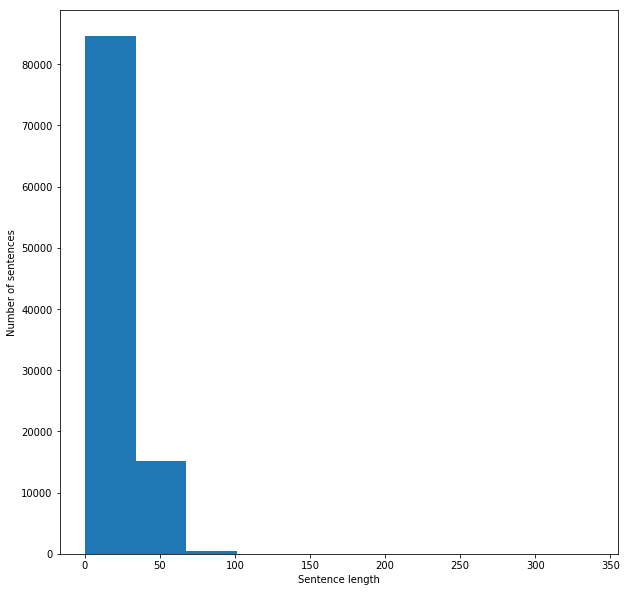

In [96]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

### On to the Machine Learning<br />
Now that our data is clean and prepared, let's dive in to the machine learning part.
<br /><br />
Enter embeddings
Machine Learning on images can use raw pixels as inputs. Fraud detection algorithms can use customer features. What can NLP use?
<br /><br />
A natural way to represent text for computers is to encode each character individually, this seems quite inadequate to represent and understand language. Our goal is to first create a useful embedding for each sentence (or tweet) in our dataset, and then use these embeddings to accurately predict the relevant category.
<br /><br />
The simplest approach we can start with is to use a bag of words model, and apply a logistic regression on top. A bag of words just associates an index to each word in our vocabulary, and embeds each sentence as a list of 0s, with a 1 at each index corresponding to a word present in the sentence.
<br /><br />
### Bag of Words Counts¶

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = df_non_dup["sentence"].tolist()
list_labels = df_non_dup["region"].tolist()

counts, count_vectorizer = cv(list_corpus)

X_train_counts, X_test_counts, y_train_counts, y_test_counts = train_test_split(counts, list_labels, test_size=0.2, random_state=40)

Visualize the embeddings

In [105]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches

def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['green','red','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='green', label='Irrelevant')
            green_patch = mpatches.Patch(color='red', label='Disaster')
            plt.legend(handles=[red_patch, green_patch])


fig = plt.figure(figsize=(16, 16))          
plot_LSA(counts, list_labels)
plt.show()

AttributeError: 'list' object has no attribute 'shape'

### Fitting a classifier<br /><br />
Starting with a logistic regression is a good idea. It is simple, often gets the job done, and is easy to interpret.

In [108]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train_counts)

y_predicted_counts = clf.predict(X_test_counts)

### Evaluation<br />
Let's start by looking at some metrics to see if our classifier performed well at all.

In [109]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test_counts, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.865, precision = 0.911, recall = 0.865, f1 = 0.882


In [ ]:
### Inspection
A metric is one thing, but in order to make an actionnable decision, we need to actually inspect the kind of mistakes our classifier is making. Let's start by looking at the confusion matrix.

In [148]:
# From here on out we will focus on the text portions of the dataset. Tokenizing the text of article using sci-kits Count Vectorizer(bag of words methodolgy):

# Articles from The Guardian
guardian_count_vect = CountVectorizer(stop_words="english")
guardian_matrix_CV = guardian_count_vect.fit_transform(df['bodytext'][df['source'].isin(['guardian'])])
guardian_features  = guardian_count_vect.get_feature_names()

# Articles NOT from The Guardian
not_guardian_count_vect = CountVectorizer(stop_words="english")
not_guardian_matrix_CV = not_guardian_count_vect.fit_transform(df['bodytext'][df['source'].isin(['fake_npr'])])
not_guardian_features  = not_guardian_count_vect.get_feature_names()


In [149]:
guardian_count_vect.vocabulary_.get(u'algorithm')
not_guardian_count_vect.vocabulary_.get(u'algorithm')

6621

<br /><br /><br /><br />
# WORD2VEC TESTING

In [206]:
from gensim.models import word2vec
from gensim.models.keyedvectors import KeyedVectors
#from gensim.models.translation_matrix import BackMappingTranslationMatrix
from gensim.models.translation_matrix import TranslationMatrix
import logging

In [172]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentences_lower = word2vec.Text8Corpus('~/Downloads/text8')
sentences_upper = word2vec.Text8Corpus('~/Downloads/text8_upper')
 


In [173]:
model_lower = word2vec.Word2Vec(sentences_lower, size=200) # size is the number of nodes in NN, bigger requires more data, but could be more accurate
model_upper = word2vec.Word2Vec(sentences_upper, size=200)


2018-01-15 14:30:02,950 : INFO : collecting all words and their counts
2018-01-15 14:30:02,956 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-01-15 14:30:08,133 : INFO : collected 253854 word types from a corpus of 17005207 raw words and 1701 sentences
2018-01-15 14:30:08,134 : INFO : Loading a fresh vocabulary
2018-01-15 14:30:08,511 : INFO : min_count=5 retains 71290 unique words (28% of original 253854, drops 182564)
2018-01-15 14:30:08,512 : INFO : min_count=5 leaves 16718844 word corpus (98% of original 17005207, drops 286363)
2018-01-15 14:30:08,744 : INFO : deleting the raw counts dictionary of 253854 items
2018-01-15 14:30:08,754 : INFO : sample=0.001 downsamples 38 most-common words
2018-01-15 14:30:08,755 : INFO : downsampling leaves estimated 12506280 word corpus (74.8% of prior 16718844)
2018-01-15 14:30:08,755 : INFO : estimated required memory for 71290 words and 200 dimensions: 149709000 bytes
2018-01-15 14:30:09,015 : INFO : resetting la

2018-01-15 14:31:16,964 : INFO : min_count=5 leaves 16718844 word corpus (98% of original 17005207, drops 286363)
2018-01-15 14:31:17,185 : INFO : deleting the raw counts dictionary of 253854 items
2018-01-15 14:31:17,197 : INFO : sample=0.001 downsamples 38 most-common words
2018-01-15 14:31:17,198 : INFO : downsampling leaves estimated 12506280 word corpus (74.8% of prior 16718844)
2018-01-15 14:31:17,198 : INFO : estimated required memory for 71290 words and 200 dimensions: 149709000 bytes
2018-01-15 14:31:17,461 : INFO : resetting layer weights
2018-01-15 14:31:18,483 : INFO : training model with 3 workers on 71290 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2018-01-15 14:31:19,498 : INFO : PROGRESS: at 1.65% examples, 1009652 words/s, in_qsize 5, out_qsize 0
2018-01-15 14:31:20,503 : INFO : PROGRESS: at 3.42% examples, 1055134 words/s, in_qsize 5, out_qsize 0
2018-01-15 14:31:21,513 : INFO : PROGRESS: at 5.07% examples, 1044366 words/s, in_qsize 6

In [175]:
model_lower.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)


/Users/dan/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('queen', 0.6422957181930542)]

In [176]:
model_upper.most_similar(positive=['WOMAN', 'KING'], negative=['MAN'], topn=1)

/Users/dan/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('QUEEN', 0.6810092926025391)]

In [177]:
model_lower.most_similar(positive=['woman', 'king'], negative=['man'], topn=2) # woman + king - man = queen (or prince)


/Users/dan/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('queen', 0.6422957181930542), ('prince', 0.5756404399871826)]

In [178]:
model_lower.most_similar(['man'])


/Users/dan/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('woman', 0.7012708783149719),
 ('girl', 0.6079072952270508),
 ('creature', 0.5665295124053955),
 ('person', 0.5221549868583679),
 ('boy', 0.5119364261627197),
 ('evil', 0.511446475982666),
 ('thief', 0.5090669393539429),
 ('bride', 0.49297720193862915),
 ('totoro', 0.4882364571094513),
 ('god', 0.4881860315799713)]

In [195]:
model_lower.save('text8_lower.model')
model_lower.wv.save_word2vec_format('text_lower.model.bin', binary=True)
model1_lower = KeyedVectors.load_word2vec_format('text_lower.model.bin', binary=True)
model1_lower.most_similar(['girl', 'father'], ['boy'], topn=3) # girl is to father as boy is to ???


2018-01-15 15:47:37,417 : INFO : saving Word2Vec object under text8_lower.model, separately None
2018-01-15 15:47:37,418 : INFO : storing np array 'syn0' to text8_lower.model.wv.syn0.npy
2018-01-15 15:47:37,460 : INFO : not storing attribute syn0norm
2018-01-15 15:47:37,461 : INFO : storing np array 'syn1neg' to text8_lower.model.syn1neg.npy
2018-01-15 15:47:37,506 : INFO : not storing attribute cum_table
2018-01-15 15:47:37,686 : INFO : saved text8_lower.model
2018-01-15 15:47:37,687 : INFO : storing 71290x200 projection weights into text_lower.model.bin
2018-01-15 15:47:38,116 : INFO : loading projection weights from text_lower.model.bin
2018-01-15 15:47:38,855 : INFO : loaded (71290, 200) matrix from text_lower.model.bin
2018-01-15 15:47:38,882 : INFO : precomputing L2-norms of word weight vectors


[('mother', 0.7659491300582886),
 ('wife', 0.7009589672088623),
 ('grandmother', 0.6990747451782227)]

In [197]:
model_upper.save('text8_upper.model')
model_upper.wv.save_word2vec_format('text_upper.model.bin', binary=True)
model1_upper = KeyedVectors.load_word2vec_format('text_upper.model.bin', binary=True)
model1_upper.most_similar(['GIRL', 'FATHER'], ['BOY'], topn=3) # girl is to father as boy is to ???

2018-01-15 15:48:04,209 : INFO : saving Word2Vec object under text8_upper.model, separately None
2018-01-15 15:48:04,210 : INFO : storing np array 'syn0' to text8_upper.model.wv.syn0.npy
2018-01-15 15:48:04,256 : INFO : not storing attribute syn0norm
2018-01-15 15:48:04,257 : INFO : storing np array 'syn1neg' to text8_upper.model.syn1neg.npy
2018-01-15 15:48:04,302 : INFO : not storing attribute cum_table
2018-01-15 15:48:04,482 : INFO : saved text8_upper.model
2018-01-15 15:48:04,483 : INFO : storing 71290x200 projection weights into text_upper.model.bin
2018-01-15 15:48:04,947 : INFO : loading projection weights from text_upper.model.bin
2018-01-15 15:48:05,683 : INFO : loaded (71290, 200) matrix from text_upper.model.bin
2018-01-15 15:48:05,684 : INFO : precomputing L2-norms of word weight vectors


[('MOTHER', 0.768741250038147),
 ('GRANDMOTHER', 0.7020315527915955),
 ('WIFE', 0.6858149170875549)]

In [198]:
more_examples = ["he is she", "big bigger bad", "going went being"] 

for example in more_examples:
     a, b, x = example.split()
     predicted = model.most_similar([x, b], [a])[0][0]
     print("'%s' is to '%s' as '%s' is to '%s'" % (a, b, x, predicted))


'he' is to 'is' as 'she' is to 'exists'
'big' is to 'bigger' as 'bad' is to 'worse'
'going' is to 'went' as 'being' is to 'was'


/Users/dan/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


In [199]:
tags = [('one', 'ONE'),('two', 'TWO'),('three', 'THREE'),('four', 'FOUR'),('five', 'FIVE'),('six', 'SIX'),('seven', 'SEVEN'),('eight', 'EIGHT'),('nine', 'NINE'),('ten', 'TEN'),('the', 'THE'),('a', 'A'),('that', 'THAT'),('this', 'THIS'),('zero', 'ZERO')]

In [217]:
# look at a translation between the upper and lowercase files that I made
#transmat = BackMappingTranslationMatrix(tagged_docs=, source_lang_vec=model1_lower, target_lang_vec=model1_upper, random_state=None)
transmat = TranslationMatrix(source_lang_vec=model1_lower, target_lang_vec=model1_upper, random_state=None)
transmat.train(tags)
print ("the shape of translation matrix is: ", transmat.translation_matrix.shape)
translated_word = transmat.translate(['words'], topn=3)
#gensim.models.translation_matrix.BackMappingTranslationMatrix(tags, model_lower, model_upper, random_state=None)

the shape of translation matrix is:  (200, 200)


/Users/dan/anaconda3/envs/insight/lib/python3.6/site-packages/gensim/models/translation_matrix.py:226: UserWarning: The parameter source_lang_vec isn't specified, use the model's source language word vector as default.
  "The parameter source_lang_vec isn't specified, "
/Users/dan/anaconda3/envs/insight/lib/python3.6/site-packages/gensim/models/translation_matrix.py:233: UserWarning: The parameter target_lang_vec isn't specified, use the model's target language word vector as default.
  "The parameter target_lang_vec isn't specified, "


In [233]:
# Now we're going to test our translation

words = [("vary", "ONE"), ("two", "TWO"), ("three", "THREE"), ("four", "FOUR"), ("five", "FIVE")]
source_word, target_word = zip(*words)
translated_word = transmat.translate(source_word, 5,)



/Users/dan/anaconda3/envs/insight/lib/python3.6/site-packages/gensim/models/translation_matrix.py:226: UserWarning: The parameter source_lang_vec isn't specified, use the model's source language word vector as default.
  "The parameter source_lang_vec isn't specified, "
/Users/dan/anaconda3/envs/insight/lib/python3.6/site-packages/gensim/models/translation_matrix.py:233: UserWarning: The parameter target_lang_vec isn't specified, use the model's target language word vector as default.
  "The parameter target_lang_vec isn't specified, "


In [234]:
#print(dir(translated_word))

for k, v in translated_word.items():
    print ("word ", k, " and translated word", v)

word  vary  and translated word ['THIS', 'TEN', 'MULTIPLE', 'THESE', 'CERTAIN']
word  two  and translated word ['TWO', 'THREE', 'FOUR', 'ZERO', 'FIVE']
word  three  and translated word ['THREE', 'FOUR', 'FIVE', 'SIX', 'TWO']
word  four  and translated word ['FOUR', 'FIVE', 'SIX', 'THREE', 'SEVEN']
word  five  and translated word ['FIVE', 'FOUR', 'SIX', 'THREE', 'SEVEN']


<br /><br /><br /><br />
# WORD2VEC TESTING WITH PHRASES

In [229]:
from gensim.models.phrases import Phrases

In [239]:
phrases_lower = Phrases(open('/Users/dan/Downloads/text8', 'r').readlines())
phrases_upper = Phrases(open('/Users/dan/Downloads/text8_upper', 'r').readlines())

2018-01-15 16:26:12,562 : INFO : collecting all words and their counts
2018-01-15 16:26:12,563 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types


KeyboardInterrupt: 